<a href="https://colab.research.google.com/github/HumbertoJRR/Precticas/blob/main/Copia_de_practica_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importamos las librerias
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
#cargamos los datos
datos = pd.read_csv('/content/diabetes.csv', sep=",")
datos.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
# Tipo de cada columna
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Dimensiones del dataset
datos.shape

(768, 9)

In [ ]:
# Número de datos ausentes por variable
datos.isna().sum().sort_values()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No se observa ningun valor nulo para nuestra base

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/dis

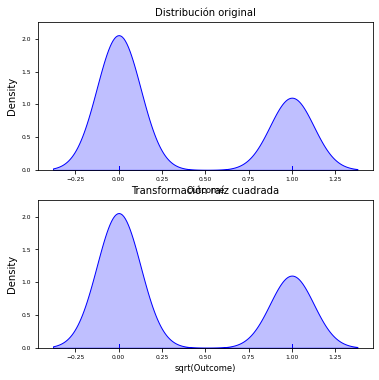

In [ ]:
#Grafica de la variable respuesta
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))
sns.distplot(
    datos.Outcome,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('Outcome', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(datos.Outcome),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(Outcome)', fontsize='small') 
axes[1].tick_params(labelsize = 6)


In [ ]:
%pip install Fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for Fitter: filename=fitter-1.5.2-py3-none-any.whl size=25609 sha256=631eb2c15a1a61b0f40339768b455c4196b5df3bb09c63aeb115f4951f6fbd7d
  Stored in directory: /root/.cache/pip/wheels/8e/6b/cb/628035771acab95dc84f200590b4838c7c3095a70ede67a25a
Successfully built Fitter


In [ ]:
#distribucion de los datos

from fitter import Fitter, get_common_distributions
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(datos.Outcome, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

Fitting 9 distributions: 100%|██████████| 9/9 [00:01<00:00,  6.57it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,3543.786471,639.704187,1194.327267,inf,0.650885,1.624191e-318
powerlaw,3931.417538,208.107379,1274.048953,inf,0.650852,1.769536e-318
beta,4851.741348,140.805017,1442.232037,inf,0.571525,7.350639e-238
exponpow,5084.614461,59.999293,1471.593260,inf,0.651042,1.081075e-318
chi2,5182.083000,134.888308,1486.175960,inf,0.651042,1.081075e-318
expon,5219.691729,80.006614,1485.085767,inf,0.651042,1.081075e-318
logistic,5394.559470,102.935658,1510.393361,inf,0.376143,4.169767e-98
norm,5397.671318,86.307988,1510.836253,inf,0.418994,1.105357e-122
cauchy,5456.271701,8294.374036,1519.129190,inf,0.438773,4.292131e-135


In [ ]:
# Variables numéricas
datos.select_dtypes(include=['float64', 'int']).describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


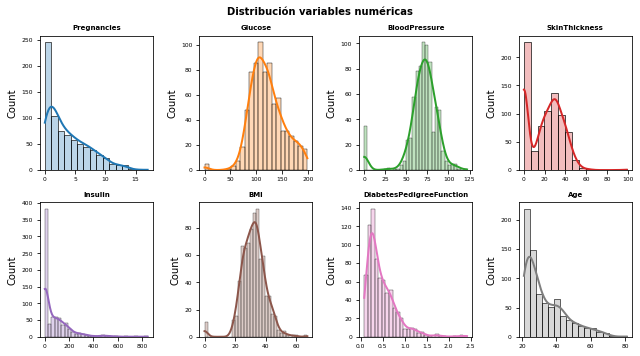

In [ ]:
# Gráfico de distribución para cada variable numérica
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Outcome')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

Glucose, BloodPressure, SkinThickness y BMI parecen ser semejantes a variables normales y el resto se asemejan a se parecen a una variable exponencial

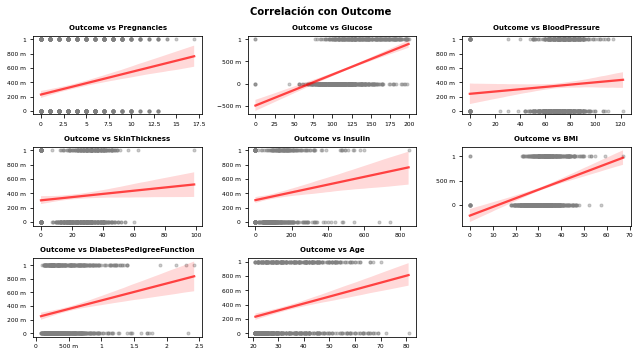

In [ ]:
# Gráfico de distribución para cada variable numérica
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Outcome')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos[colum],
        y           = datos['Outcome'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Outcome vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con Outcome', fontsize = 10, fontweight = "bold");

No se muestra una correlacion directa de Outcome con ninguna variable

In [ ]:
# Correlación entre columnas numéricas
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
63,Age,Pregnancies,0.544341,0.544341
7,Pregnancies,Age,0.544341,0.544341
17,Glucose,Outcome,0.466581,0.466581
73,Outcome,Glucose,0.466581,0.466581
39,Insulin,SkinThickness,0.436783,0.436783
31,SkinThickness,Insulin,0.436783,0.436783
48,BMI,SkinThickness,0.392573,0.392573
32,SkinThickness,BMI,0.392573,0.392573
37,Insulin,Glucose,0.331357,0.331357
13,Glucose,Insulin,0.331357,0.331357


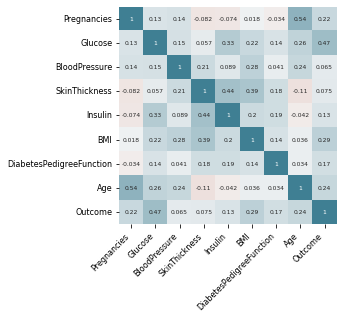

In [ ]:
# Heatmap matriz de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

Ninguna correlacion es grande entre las variables, las mayores son pregnancies y age con 0.54 y Glucose y outcome con 0.47